In [48]:
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv("cancer patient data sets.csv")

In [50]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [51]:
data.shape

(1000, 26)

In [52]:
data.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [53]:
data.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [54]:
data.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Drop non-numeric columns
non_numeric_columns = ['index', 'Patient Id', 'Level']  # Adjust if needed
numeric_columns = [col for col in data.columns if col not in non_numeric_columns]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Display the first few rows of the scaled dataset
print(data.head())


   index Patient Id       Age  Gender  Air Pollution  Alcohol use  \
0      0         P1  0.322034     0.0       0.142857     0.428571   
1      1        P10  0.050847     0.0       0.285714     0.000000   
2      2       P100  0.355932     0.0       0.428571     0.571429   
3      3      P1000  0.389831     0.0       0.857143     0.857143   
4      4       P101  0.542373     0.0       0.714286     1.000000   

   Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
0      0.571429              0.428571      0.333333              0.166667   
1      0.571429              0.285714      0.500000              0.166667   
2      0.714286              0.571429      0.666667              0.500000   
3      0.857143              0.857143      0.833333              1.000000   
4      0.857143              0.857143      1.000000              0.833333   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...    0.250     0.428571                0.125  0.142857

In [56]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,0.322034,0.0,0.142857,0.428571,0.571429,0.428571,0.333333,0.166667,...,0.250,0.428571,0.125,0.142857,0.285714,0.000,0.166667,0.333333,0.500000,Low
1,1,P10,0.050847,0.0,0.285714,0.000000,0.571429,0.285714,0.500000,0.166667,...,0.000,0.285714,0.750,1.000000,0.714286,0.125,0.000000,1.000000,0.166667,Medium
2,2,P100,0.355932,0.0,0.428571,0.571429,0.714286,0.571429,0.666667,0.500000,...,0.875,0.857143,1.000,0.142857,0.000000,0.375,0.833333,1.000000,0.166667,High
3,3,P1000,0.389831,0.0,0.857143,0.857143,0.857143,0.857143,0.833333,1.000000,...,0.375,0.142857,0.250,0.000000,0.428571,0.500,0.833333,1.000000,0.666667,High
4,4,P101,0.542373,0.0,0.714286,1.000000,0.857143,0.857143,1.000000,0.833333,...,0.250,0.142857,0.375,0.000000,0.428571,0.125,0.500000,0.166667,0.333333,High


In [57]:
data = data.drop(columns = ['Patient Id'])

In [58]:
def convert(level):
    if level == 'Low':
        return 0
    elif level == 'Medium':
        return 1
    else:
        return 2

In [59]:
# Convert 'Level' column to numerical values using the convert function
data['Level'] = data['Level'].apply(convert)

# Display the first few rows to confirm
print(data[['Level']].head())


   Level
0      0
1      1
2      2
3      2
4      2


In [60]:
data.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,0.322034,0.0,0.142857,0.428571,0.571429,0.428571,0.333333,0.166667,0.166667,...,0.250,0.428571,0.125,0.142857,0.285714,0.000,0.166667,0.333333,0.500000,0
1,1,0.050847,0.0,0.285714,0.000000,0.571429,0.285714,0.500000,0.166667,0.166667,...,0.000,0.285714,0.750,1.000000,0.714286,0.125,0.000000,1.000000,0.166667,1
2,2,0.355932,0.0,0.428571,0.571429,0.714286,0.571429,0.666667,0.500000,0.833333,...,0.875,0.857143,1.000,0.142857,0.000000,0.375,0.833333,1.000000,0.166667,2
3,3,0.389831,0.0,0.857143,0.857143,0.857143,0.857143,0.833333,1.000000,1.000000,...,0.375,0.142857,0.250,0.000000,0.428571,0.500,0.833333,1.000000,0.666667,2
4,4,0.542373,0.0,0.714286,1.000000,0.857143,0.857143,1.000000,0.833333,1.000000,...,0.250,0.142857,0.375,0.000000,0.428571,0.125,0.500000,0.166667,0.333333,2


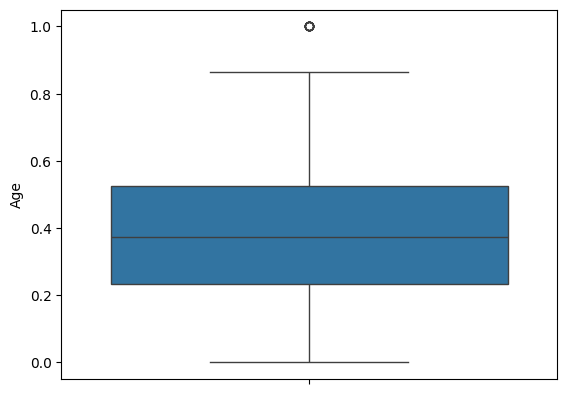

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Check for outliers in Glucose
sns.boxplot(data['Age'])
plt.show()


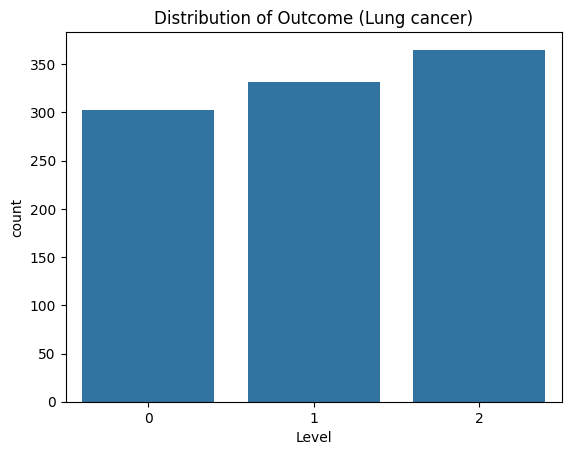

In [62]:
sns.countplot(x='Level', data=data)
plt.title('Distribution of Outcome (Lung cancer)')
plt.show()


In [63]:
print(data.columns)


Index(['index', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


In [64]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = ['Level'])
y = data['Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [65]:
print(data.shape)  # Check the shape of the dataframe


(1000, 25)


In [66]:
data.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,0.322034,0.0,0.142857,0.428571,0.571429,0.428571,0.333333,0.166667,0.166667,...,0.250,0.428571,0.125,0.142857,0.285714,0.000,0.166667,0.333333,0.500000,0
1,1,0.050847,0.0,0.285714,0.000000,0.571429,0.285714,0.500000,0.166667,0.166667,...,0.000,0.285714,0.750,1.000000,0.714286,0.125,0.000000,1.000000,0.166667,1
2,2,0.355932,0.0,0.428571,0.571429,0.714286,0.571429,0.666667,0.500000,0.833333,...,0.875,0.857143,1.000,0.142857,0.000000,0.375,0.833333,1.000000,0.166667,2
3,3,0.389831,0.0,0.857143,0.857143,0.857143,0.857143,0.833333,1.000000,1.000000,...,0.375,0.142857,0.250,0.000000,0.428571,0.500,0.833333,1.000000,0.666667,2
4,4,0.542373,0.0,0.714286,1.000000,0.857143,0.857143,1.000000,0.833333,1.000000,...,0.250,0.142857,0.375,0.000000,0.428571,0.125,0.500000,0.166667,0.333333,2


In [67]:
from sklearn.impute import SimpleImputer

# Impute missing values in 'Level' (target) column
imputer = SimpleImputer(strategy='most_frequent')  # You can also use 'mean', 'median', etc.
y_imputed = imputer.fit_transform(data['Level'].values.reshape(-1, 1)).ravel()

# Update the target column in the dataset
data['Level'] = y_imputed

# Now split X and y again
X = data.iloc[:, :-1]  # All columns except the last one ('Level')
y = data['Level']      # Target column

print(X.shape, y.shape)  # Check if there are any rows now


(1000, 24) (1000,)


In [68]:
# Drop rows with missing values in both features and target columns
data_cleaned = data.dropna()

# Split features and target after cleaning
X_cleaned = data_cleaned.iloc[:, :-1]
y_cleaned = data_cleaned['Level']

print(X_cleaned.shape, y_cleaned.shape)  # Ensure this has non-zero rows


(1000, 24) (1000,)


In [69]:
data['Level'].unique()

array([0, 1, 2])

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
ml_model = RandomForestRegressor()

In [72]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [74]:
y_pred = ml_model.predict(X_test)

In [75]:
y_pred

array([1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 2., 0.,
       2., 2., 2., 2., 1., 0., 1., 2., 0., 1., 2., 0., 0., 0., 2., 1., 0.,
       0., 2., 2., 1., 2., 0., 2., 2., 0., 1., 1., 0., 0., 1., 2., 0., 1.,
       2., 0., 2., 2., 2., 0., 2., 2., 0., 1., 0., 2., 2., 0., 1., 2., 2.,
       1., 2., 2., 0., 1., 1., 1., 1., 2., 0., 0., 1., 1., 1., 0., 1., 2.,
       2., 2., 0., 2., 2., 0., 0., 1., 2., 2., 2., 2., 2., 1., 0., 0., 2.,
       0., 0., 1., 2., 2., 1., 1., 1., 1., 2., 2., 0., 1., 2., 1., 2., 1.,
       1., 2., 2., 0., 0., 1., 2., 2., 2., 2., 2., 0., 1., 0., 2., 1., 0.,
       1., 2., 1., 1., 0., 1., 0., 0., 2., 1., 0., 2., 0., 2., 2., 0., 0.,
       2., 0., 2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 1., 1., 2., 2., 2.,
       2., 1., 2., 2., 0., 2., 1., 0., 1., 2., 0., 2., 0., 1., 2., 1., 2.,
       1., 0., 1., 0., 0., 1., 2., 2., 1., 2., 2., 0., 1.])

In [77]:
from sklearn import metrics

In [78]:
metrics.r2_score(y_test,y_pred)

1.0

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print("="*50)


C:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.9600
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        55
           1       0.92      0.95      0.94        63
           2       0.99      1.00      0.99        82

    accuracy                           0.96       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200

Confusion Matrix:
[[50  5  0]
 [ 2 60  1]
 [ 0  0 82]]
Model: Random Forest
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[55  0  0]
 [ 0 63  0]
 [ 0  0 82]]


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.88
Mean Squared Error (MSE): 1.39
Root Mean Squared Error (RMSE): 1.1789826122551597
R-squared (R²): -1.0846612425480862


In [81]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.9999873482051627


In [82]:
import pandas as pd

# Get feature importances
feature_importances = pd.DataFrame(ml_model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)


                          importance
Obesity                     0.397975
Coughing of Blood           0.109070
Alcohol use                 0.106931
Wheezing                    0.105430
Snoring                     0.071696
Fatigue                     0.041408
Genetic Risk                0.024967
Balanced Diet               0.024334
Air Pollution               0.022292
Passive Smoker              0.021552
Clubbing of Finger Nails    0.018287
Shortness of Breath         0.012176
Swallowing Difficulty       0.011872
OccuPational Hazards        0.008952
Smoking                     0.006019
Dust Allergy                0.005618
Chest Pain                  0.004728
Dry Cough                   0.003465
chronic Lung Disease        0.000992
Weight Loss                 0.000900
Frequent Cold               0.000817
Age                         0.000522
index                       0.000000
Gender                      0.000000


In [83]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ml_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validated MAE: {-scores.mean()}")


Cross-validated MAE: 6.000000000000001e-05


In [84]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Initialize base models
model1 = RandomForestRegressor()
model2 = GradientBoostingRegressor()
model3 = SVR()

# Create a voting regressor
ensemble_model = VotingRegressor(estimators=[('rf', model1), ('gb', model2), ('svr', model3)])

ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
print(f"Ensemble MAE: {mae_ensemble}")


NameError: name 'GradientBoostingRegressor' is not defined

In [85]:
import joblib

# Save the trained model
joblib.dump(ml_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [86]:
# Load the model from the file
loaded_model = joblib.load('random_forest_model.pkl')

# Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_absolute_error
mae_loaded = mean_absolute_error(y_test, y_pred_loaded)
print(f"Loaded Model MAE: {mae_loaded}")



Loaded Model MAE: 0.0
